## Import EDA libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

%matplotlib inline

## Import Datafiles from Consumer Finance Protection Bureau API
#### Consumer_Complaints.csv (full dataset)
#### Consumer_Complaints_with_Consumer_Complaint_Narratives.csv (with text complaints only)

In [2]:
#df = pd.read_csv('../data/Consumer_Complaints.csv')
df = pd.read_csv('../data/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv')

In [3]:
# df.info() #596096 entries, 18 columns

In [4]:
df.info() #84466 entries, 18 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84466 entries, 0 to 84465
Data columns (total 18 columns):
Date received                   84466 non-null object
Product                         84466 non-null object
Sub-product                     58444 non-null object
Issue                           84466 non-null object
Sub-issue                       41852 non-null object
Consumer complaint narrative    84466 non-null object
Company public response         41173 non-null object
Company                         84466 non-null object
State                           84232 non-null object
ZIP code                        84229 non-null object
Tags                            14332 non-null object
Consumer consent provided?      84466 non-null object
Submitted via                   84466 non-null object
Date sent to company            84466 non-null object
Company response to consumer    84466 non-null object
Timely response?                84466 non-null object
Consumer disputed?         

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/24/2015,Credit card,NaN,Other,NaN,Received Capital One charge card offer XXXX. A...,NaN,Capital One,OH,440XX,NaN,Consent provided,Web,03/30/2015,Closed with explanation,Yes,No,1297939
1,03/23/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted me after I asked not to,I do n't know how they got my cell number. I t...,NaN,"CCS Financial Services, Inc.",AR,727XX,NaN,Consent provided,Web,03/23/2015,Closed with explanation,Yes,No,1296593
2,03/23/2015,Credit card,NaN,Rewards,NaN,I 'm a longtime member of Charter One Bank/RBS...,NaN,"Citizens Financial Group, Inc.",MI,482XX,NaN,Consent provided,Web,03/23/2015,Closed with explanation,Yes,Yes,1296693
3,03/23/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,"After looking at my credit report, I saw a col...",Company chooses not to provide a public response,Experian,FL,331XX,NaN,Consent provided,Web,03/27/2015,Closed with non-monetary relief,Yes,No,1296955
4,03/23/2015,Debt collection,Payday loan,Improper contact or sharing of info,Talked to a third party about my debt,I received a call from a XXXX XXXX from XXXX @...,NaN,"Big Picture Loans, LLC",SC,291XX,NaN,Consent provided,Web,03/23/2015,Closed with explanation,Yes,No,1296727


### Checkout each column, just using "df" for now to get the whole scope of data

#### Date Recieved

In [6]:
df['Date received'].value_counts(dropna=False)
# df['Date received'].value_counts(dropna=False).shape #(1688,)
# put date in datetime format
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date

print df['Date received'].min()
print df['Date received'].max()

2015-03-19
2016-06-28


#### Product

In [7]:
df['Product'].value_counts(dropna=False)
# df['Product'].value_counts(dropna=False).shape #(11,)

Debt collection            22120
Mortgage                   18855
Credit reporting           16147
Credit card                 9875
Bank account or service     7260
Consumer Loan               4721
Student loan                2674
Prepaid card                 952
Payday loan                  911
Money transfers              820
Other financial service      131
Name: Product, dtype: int64

#### Sub-product

In [8]:
# df['Sub-product'].value_counts(dropna=False)
# df['Sub-product'].value_counts(dropna=False).shape #(46,)

#### Issue

In [9]:
df['Issue'].value_counts(dropna=False)
df['Issue'].value_counts(dropna=False).shape #(90,)

(90,)

#### Sub-Issue

In [10]:
df['Sub-issue'].value_counts()
df['Sub-issue'].value_counts().shape   #(64,)

(64,)

#### Consumer complaint narrative

In [11]:
df['Consumer complaint narrative'].value_counts(dropna=False)
df['Consumer complaint narrative'].value_counts(dropna=False).shape   #(83048,)

(83048,)

#### Company public response

In [12]:
df['Company public response'].value_counts(dropna=False)
df['Company public response'].value_counts(dropna=False).shape   #(11,)

(11,)

#### Company

In [13]:
df['Company'].value_counts(dropna=False)
df['Company'].value_counts(dropna=False).shape #(2460,)

(2460,)

#### State


In [14]:
df['State'].value_counts(dropna=False)
df['State'].value_counts(dropna=False).shape #(62,)

# Use pyzipcode to find missing zipcodes
# https://pypi.python.org/pypi/pyzipcode

(62,)

#### ZIP code

In [15]:
df['ZIP code'].value_counts(dropna=False)
df['ZIP code'].value_counts(dropna=False).shape #(920,)

(920,)

#### Tags

In [16]:
df['Tags'].value_counts(dropna=False)
df['Tags'].value_counts(dropna=False).shape   #(4,)

(4,)

#### Consumer consent provided?

In [17]:
df['Consumer consent provided?'].value_counts(dropna=False)
df['Consumer consent provided?'].value_counts(dropna=False).shape #(1,)   

(1,)

#### Submitted via

In [18]:
df['Submitted via'].value_counts()
df['Submitted via'].value_counts().shape   #(1,)

(1,)

#### Date sent to company

In [19]:
#df['Date sent to company'].value_counts(dropna=False)
# df['Date sent to company'].value_counts(dropna=False).shape #(1637,)
# put date in datetime format
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

#### Company response to consumer

In [20]:
df['Company response to consumer'].value_counts(dropna=False)
# df['Company response to consumer'].value_counts(dropna=False).shape #(5,)

Closed with explanation            64498
Closed with non-monetary relief    10882
Closed with monetary relief         6150
Closed                              2146
Untimely response                    790
Name: Company response to consumer, dtype: int64

#### Timely Response

In [21]:
df['Timely response?'].value_counts(dropna=False)
# df['Timely response?'].value_counts(dropna=False).shape  #(2,)

Yes    81460
No      3006
Name: Timely response?, dtype: int64

#### Consumer disputed?

In [22]:
df['Consumer disputed?'].value_counts(dropna=False)
# df['Consumer disputed?'].value_counts(dropna=False).shape  #(3,)df['Consumer consent provided?'].value_counts()
# df['Consumer consent provided?'].value_counts().shape   #(1,)

No     58302
Yes    19700
NaN     6464
Name: Consumer disputed?, dtype: int64

#### Complaint ID

In [23]:
# df['Complaint ID'].value_counts(dropna=False)
# df['Complaint ID'].value_counts().shape   #(84466,)

### Initial Plotting

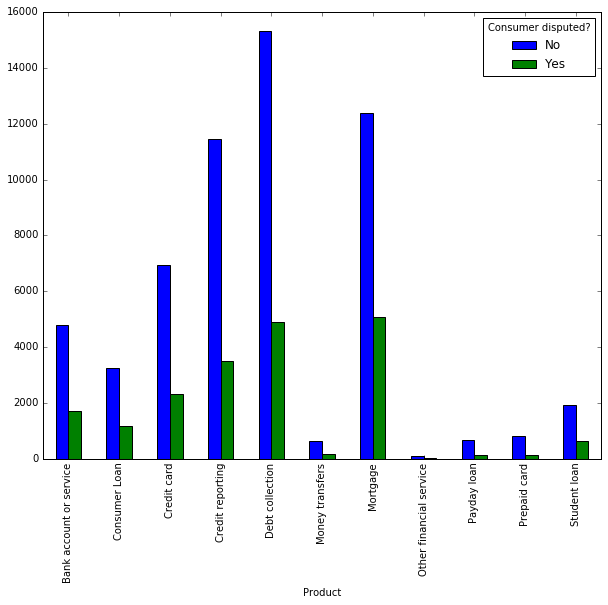

In [24]:
p1 = pd.crosstab(df['Product'], df['Consumer disputed?'])
p1.plot(kind='bar', figsize=(10,8));

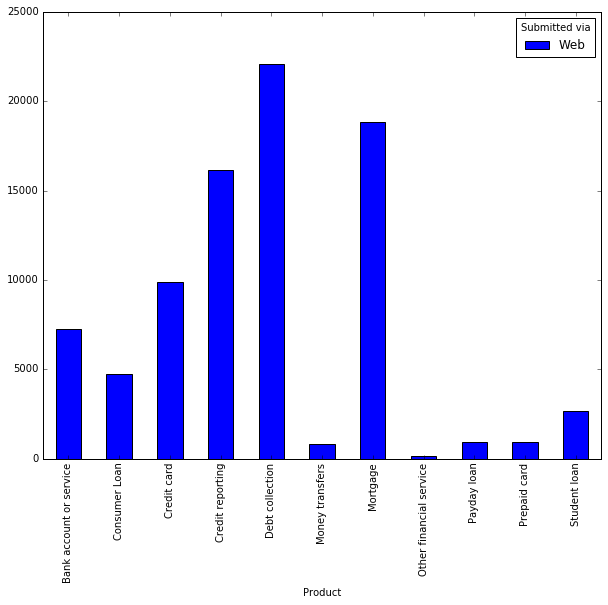

In [25]:
p2 = pd.crosstab(df['Product'], df['Submitted via'])
p2.plot(kind='bar', figsize=(10,8));

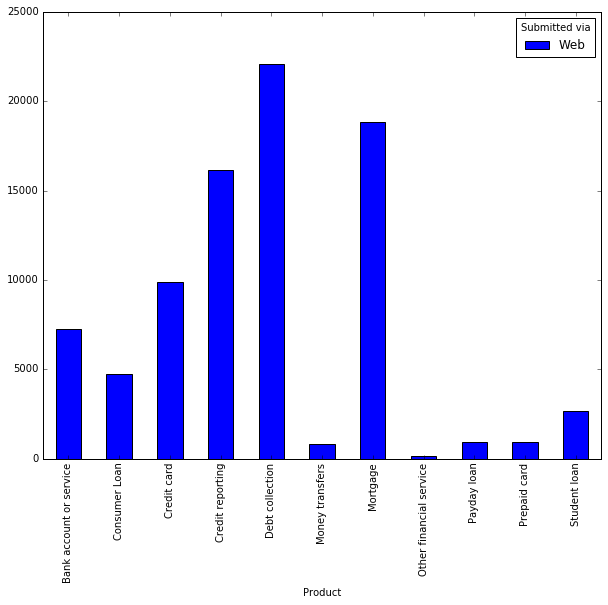

In [26]:
p3 = pd.crosstab(df['Product'], df['Submitted via'])
p3.plot(kind='bar', figsize=(10,8))

In [27]:
p3

Submitted via,Web
Product,
Bank account or service,7260
Consumer Loan,4721
Credit card,9875
Credit reporting,16147
Debt collection,22120
Money transfers,820
Mortgage,18855
Other financial service,131
Payday loan,911


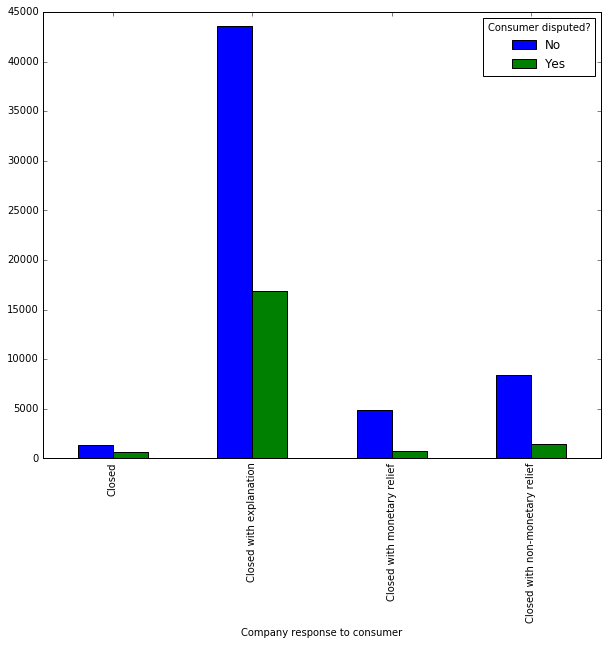

In [28]:
p4 = pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])
p4.plot(kind='bar', figsize=(10,8))

In [29]:
p4

Consumer disputed?,No,Yes
Company response to consumer,,
Closed,1395,652
Closed with explanation,43616,16849
Closed with monetary relief,4897,720
Closed with non-monetary relief,8394,1479


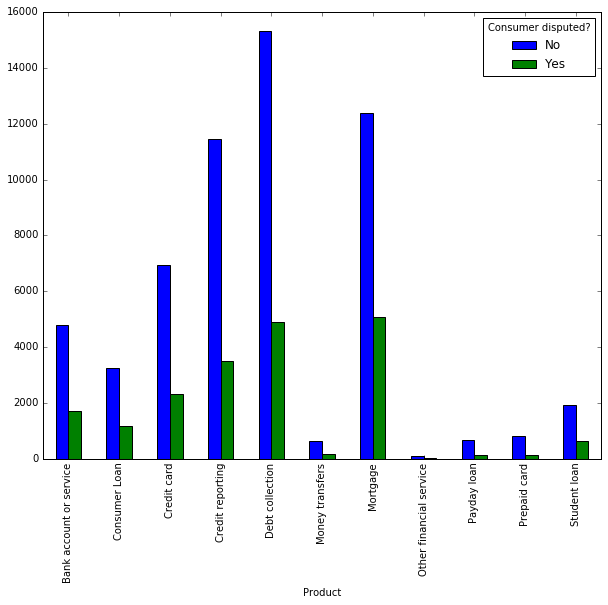

In [30]:
p5 = pd.crosstab(df['Product'], df['Consumer disputed?'])
p5.plot(kind='bar',figsize=(10,8))

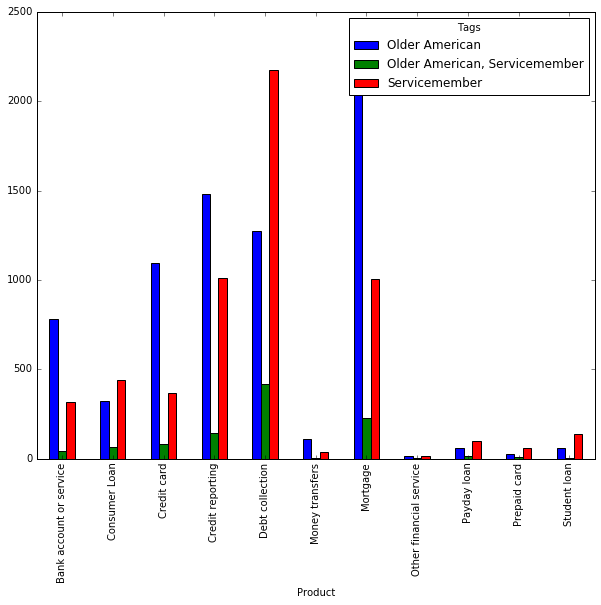

In [31]:
p6 = pd.crosstab(df['Product'], df['Tags'])
p6.plot(kind='bar',figsize=(10,8))

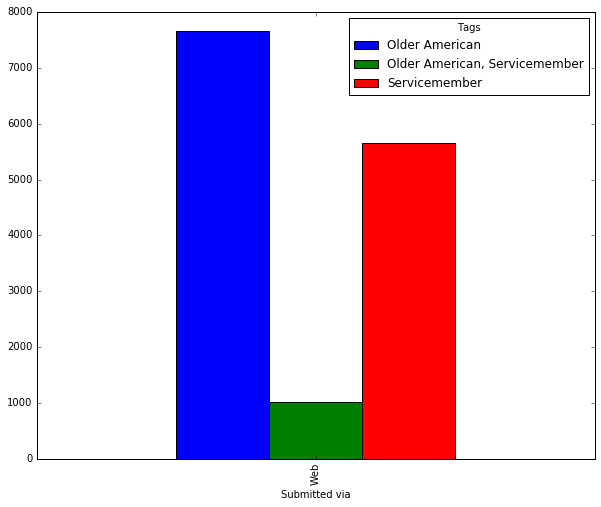

In [32]:
p7 = pd.crosstab(df['Submitted via'], df['Tags'])
p7.plot(kind='bar',figsize=(10,8))

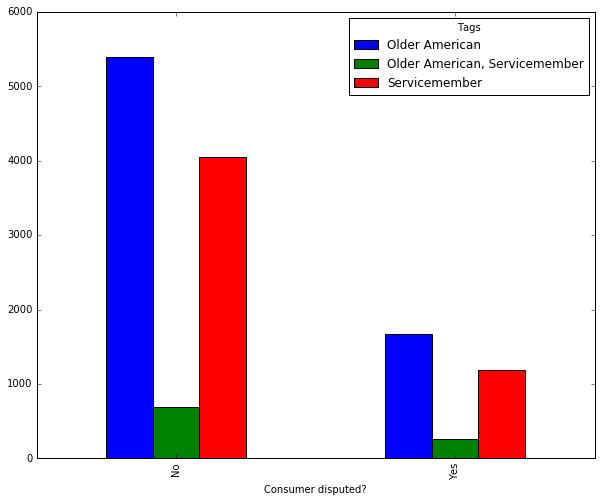

In [33]:
p8 = pd.crosstab(df['Consumer disputed?'], df['Tags'])
p8.plot(kind='bar',figsize=(10,8))

In [34]:
p9 = pd.crosstab(df['Date sent to company'], df['Submitted via'][5])
# p9
# p9.plot(kind='bar',figsize=(10,8))
#  Crappy plot, but shows that web is on the increase in full set of data, using text features it is just a mess

In [35]:
# p10 = pd.crosstab(df['Product'], df['Consumer complaint narrative'])
# p10.plot(kind='bar',figsize=(10,8))

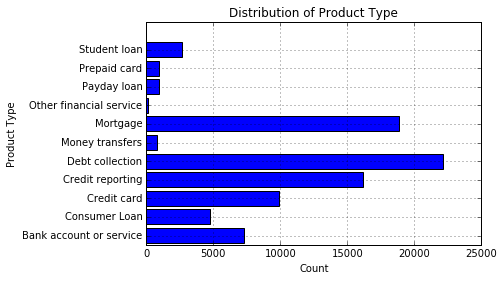

In [36]:
productCountFrame = df.groupby("Product")["Consumer complaint narrative"].count()
#from pylab import *
#val = 3+10*rand(5)    # the bar lengths
pos = np.arange(productCountFrame.shape[0])+.5    # the bar centers on the y axis

plt.barh(pos,productCountFrame, align='center')
plt.yticks(pos,productCountFrame.index)
plt.xlabel('Count')
plt.ylabel("Product Type")
plt.title('Distribution of Product Type')
plt.grid(True)
plt.show()


# https://www.kaggle.com/mmrosenb/d/cfpb/us-consumer-finance-complaints/language-analysis

## Manage missing values

In [37]:
df['Product'].fillna('Not Provided', inplace=True)
df['Sub-product'].fillna('Not Provided', inplace=True)
df['Sub-issue'].fillna('Not Provided', inplace=True)
df['Issue'].fillna('Not Provided', inplace=True)
df['Consumer complaint narrative'].fillna('Not Provided', inplace=True)
df['Company public response'].fillna('Not Provided', inplace=True)
df['Company'].fillna('Not Provided', inplace=True)
df['State'].fillna('Not Provided', inplace=True)
df['ZIP code'].fillna('Not Provided', inplace=True)
df['Tags'].fillna('Not Provided', inplace=True)
df['Consumer consent provided?'].fillna('Not Provided', inplace=True)
df['Submitted via'].fillna('Not Provided',inplace=True) 
df['Consumer disputed?'].fillna('Not Provided', inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84466 entries, 0 to 84465
Data columns (total 18 columns):
Date received                   84466 non-null object
Product                         84466 non-null object
Sub-product                     84466 non-null object
Issue                           84466 non-null object
Sub-issue                       84466 non-null object
Consumer complaint narrative    84466 non-null object
Company public response         84466 non-null object
Company                         84466 non-null object
State                           84466 non-null object
ZIP code                        84466 non-null object
Tags                            84466 non-null object
Consumer consent provided?      84466 non-null object
Submitted via                   84466 non-null object
Date sent to company            84466 non-null object
Company response to consumer    84466 non-null object
Timely response?                84466 non-null object
Consumer disputed?         

### Need to modify 'Consumer consent provided?' to have binary-ish response.
#### Assume 'Consent withdrawn' and 'Other' are equivalent to 'Consent not provided'

In [39]:
df['Consumer consent provided?'].value_counts()
#For a reminder of what is in there - All full with web/text submittals, different for full data set

Consent provided    84466
Name: Consumer consent provided?, dtype: int64

In [40]:
df['Consumer consent provided?'] = df['Consumer consent provided?'].apply(lambda x: 
        'Consent not provided' if x=='Other' or x=='Consent withdrawn'
         or x=='Not Provided' else x)

In [41]:
df['Consumer disputed?'].value_counts()

No              58302
Yes             19700
Not Provided     6464
Name: Consumer disputed?, dtype: int64

### Need to modify "Consumer disputed?" to have binary-ish response
#### Assume "Not Provided" = "No"

In [42]:
df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: 
        'No' if x=='Not Provided' else x)

In [43]:
df['Consumer disputed?'].value_counts()


No     64766
Yes    19700
Name: Consumer disputed?, dtype: int64

In [44]:
# crosstab of consent provided vs disputed
consent_provided_v_disputed = pd.crosstab(df['Consumer consent provided?'], df['Consumer disputed?'])

In [45]:
consent_provided_v_disputed
#  Print crosstab table

Consumer disputed?,No,Yes
Consumer consent provided?,,
Consent provided,64766,19700


In [46]:
#  Convert to 1/0 for labels binary response
replace_Y_N_to_1_zero = {'Yes': True, 'No':False}
df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: replace_Y_N_to_1_zero[x])

In [47]:
df['Consumer disputed?'].value_counts()

False    64766
True     19700
Name: Consumer disputed?, dtype: int64

### Fill in missing state zipcodes using pyzipcode (link above)

In [48]:
from pyzipcode import ZipCodeDatabase
zipcode=ZipCodeDatabase()

for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zipcode[df['ZIP code'][i]].state)
    except:
        continue

#### Check to see if all ZIP codes are filled

Full data set has more missing info.  Step not needed for text data set

In [49]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape #4713

(0, 18)

In [50]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [51]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape #0

(0, 18)

## Feature Engineering/Additional EDA

#### Add count of company complaints (total) for each company

In [52]:
count_company_complaints = df['Company'].value_counts()
df['Count of Company Complaints'] = df['Company'].apply(lambda x: count_company_complaints[x])

### Create numerical date features

In [53]:
# df['Recieved Year'] = df['Date received'].apply(lambda x: x.year)
# df['Recieved Month'] = df['Date received'].apply(lambda x: x.month)
# df['Recieved Day'] = df['Date received'].apply(lambda x: x.day)

# df['Submitted Year'] = df['Date sent to company'].apply(lambda x: x.year)
# df['Submitted Month'] = df['Date sent to company'].apply(lambda x: x.month)
# df['Submitted Day'] = df['Date sent to company'].apply(lambda x: x.day)

### Create Label from "Company response to consumer".  Needs to be numerical.

In [54]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            64498
Closed with non-monetary relief    10882
Closed with monetary relief         6150
Closed                              2146
Untimely response                    790
Name: Company response to consumer, dtype: int64

In [55]:
# Filter out "Not Provided"
df = df[df['Consumer complaint narrative'] != 'Not Provided']

In [56]:
# Filter out "In progress"
df = df[df['Company response to consumer'] != 'In progress']

In [57]:
df['Company response to consumer'].value_counts(dropna=False)
# df.shape

Closed with explanation            64498
Closed with non-monetary relief    10882
Closed with monetary relief         6150
Closed                              2146
Untimely response                    790
Name: Company response to consumer, dtype: int64

#### Create dict to repalce 7 leftover categories with numbers for classificaiton

In [58]:
# For use with text df
cust_resp_dict ={'Closed':0,
                 'Untimely response':0,
                 'Closed with explanation':1,
                 'Closed with non-monetary relief':2,
                 'Closed with monetary relief':2}

# # For use with full text df
# cust_resp_dict ={'Closed':0,
#                  'Untimely response':0,
#                  'Closed without relief':1,
#                  'Closed with explanation':1,
#                  'Closed with relief':2,
#                  'Closed with non-monetary relief':2,
#                  'Closed with monetary relief':2}
# #  Trying as 1 and 0 insteand of 0, 1, 2 for more simple classification.

In [59]:
df['Company response to consumer'] = df['Company response to consumer'].apply(lambda x: cust_resp_dict[x])

In [60]:
df['Company response to consumer'].value_counts(dropna=False)


1    64498
2    17032
0     2936
Name: Company response to consumer, dtype: int64

In [61]:
# df['Date received']

## Create "model_data" DF for modeling

In [62]:
model_data = pd.DataFrame()

## Assign categorical values numerical values

In [63]:
feature_for_model=['Product', 'Sub-product','Issue','Sub-issue','Tags', 'State', 'Submitted via']

for name in feature_for_model:
    val ={}
    i=0
    for value in df[name].unique(): 
        val[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: val[x])
    model_data[name] = df[name].astype('category')

In [64]:
model_data.head()

,Product,Sub-product,Issue,Sub-issue,Tags,State,Submitted via
0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0
2,0,0,2,0,0,2,0
3,2,0,3,2,0,3,0
4,1,2,1,3,0,4,0


In [65]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(model_data, alpha-0.2, figsize=99,9=)

SyntaxError: invalid syntax (<ipython-input-65-d905447ceb24>, line 2)

In [66]:
compl_v_resp = pd.crosstab(df['Count of Company Complaints'], df['Company response to consumer'])

In [67]:
compl_v_resp.head(10)

Company response to consumer,0,1,2
Count of Company Complaints,,,
1,162,472,83
2,138,485,81
3,126,423,54
4,66,512,70
5,81,453,86
6,76,428,42
7,71,421,54
8,99,453,48
9,55,376,37


In [68]:
compl_v_resp['Non-Relief Rate'] = (compl_v_resp[0] + compl_v_resp[1]) / (compl_v_resp[0] + compl_v_resp[1] + compl_v_resp[2])

In [69]:
compl_v_resp['Relief Rate'] = compl_v_resp[2] / (compl_v_resp[0] + compl_v_resp[1] + compl_v_resp[2]) 

In [70]:
compl_v_resp.describe()

Company response to consumer,0,1,2,Non-Relief Rate,Relief Rate
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,16.873563,370.678161,97.885057,0.861293,0.138707
std,31.851282,664.405319,271.505838,0.169518,0.169518
min,0.000000,5.000000,0.000000,0.050000,0.000000
25%,0.000000,108.000000,1.250000,0.812967,0.012015
50%,2.000000,184.000000,20.000000,0.903696,0.096304
75%,16.000000,301.750000,55.750000,0.987985,0.187033
max,162.000000,5091.000000,2310.000000,1.000000,0.950000


In [71]:
compl_v_resp.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1748, 1907, 1977, 3273, 3714, 3822, 4279, 4731, 5075, 5697],
           dtype='int64', name=u'Count of Company Complaints', length=174)

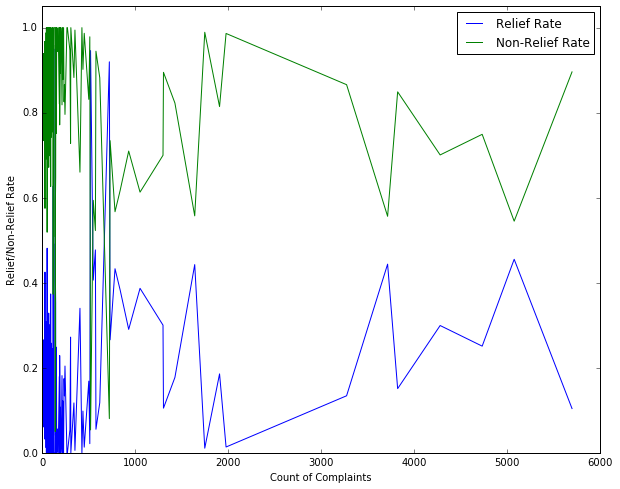

In [72]:
fig = plt.figure(figsize=(10,8))
plt.plot(compl_v_resp['Relief Rate'])
plt.plot(compl_v_resp['Non-Relief Rate'])

plt.xlim([0.0, 6000])
plt.ylim([0.0, 1.05])
plt.xlabel('Count of Complaints')
plt.ylabel('Relief/Non-Relief Rate')
#plt.title()
plt.legend(loc="upper right")
plt.show()

# Looks bad using 1/0 for releif sorting...  

In [73]:
day_sent = df['Date sent to company'].apply(lambda x: x.day)
month_sent = df['Date sent to company'].apply(lambda x: x.month)
year_sent = df['Date sent to company'].apply(lambda x: x.year)

In [74]:
month_v_resp = pd.crosstab(month_sent, df['Company response to consumer'])

In [75]:
month_v_resp['Non-Relief Rate'] = (month_v_resp[0] + month_v_resp[1]) / (month_v_resp[0] + month_v_resp[1] + month_v_resp[2])
month_v_resp['Relief Rate'] = month_v_resp[2] / (month_v_resp[0] + month_v_resp[1] + month_v_resp[2]) 

In [76]:
month_v_resp.head()

Company response to consumer,0,1,2,Non-Relief Rate,Relief Rate
Date sent to company,,,,,
1,207,4342,981,0.822604,0.177396
2,228,4356,1047,0.814065,0.185935
3,283,6303,1642,0.800438,0.199562
4,396,8686,2240,0.802155,0.197845
5,326,7613,2038,0.795730,0.204270


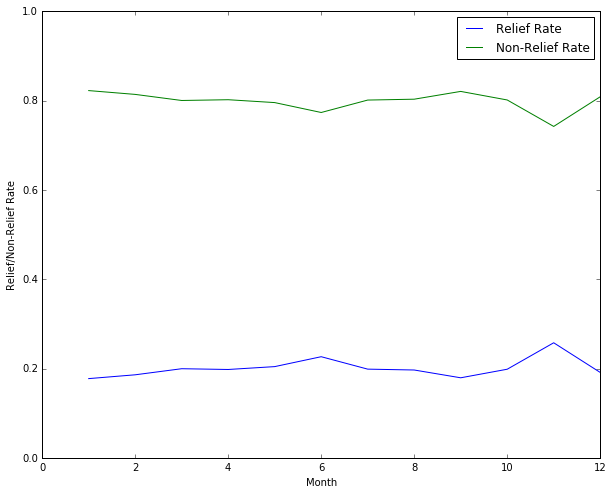

In [77]:
fig = plt.figure(figsize=(10,8))
plt.plot(month_v_resp.index,month_v_resp['Relief Rate'])
plt.plot(month_v_resp.index,month_v_resp['Non-Relief Rate'])

plt.xlim([0.0, 12])
plt.ylim([0.0, 1.0])
plt.xlabel('Month')
plt.ylabel('Relief/Non-Relief Rate')
#plt.title('')
plt.legend(loc="upper right")
plt.show()

In [78]:
state_v_resp = pd.crosstab(df['State'], df['Company response to consumer'])
state_v_resp['Relief Rate'] = (state_v_resp[0] + state_v_resp[1]) / (state_v_resp[0] + state_v_resp[1] + state_v_resp[2])
state_v_resp['Non-Relief Rate'] = state_v_resp[2] / (state_v_resp[0] + state_v_resp[1] + state_v_resp[2]) 

In [79]:
# state_v_resp

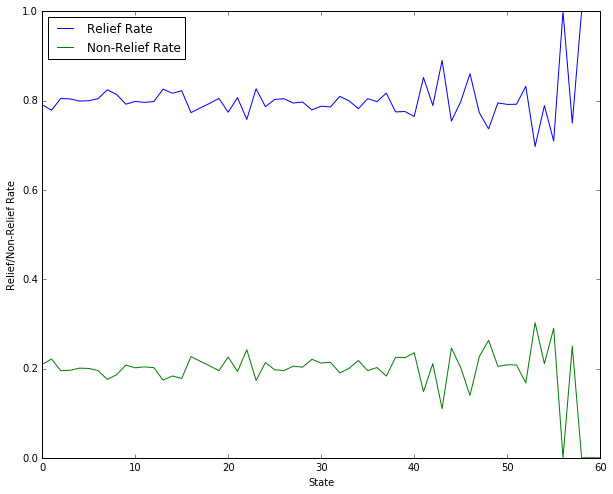

In [80]:
fig = plt.figure(figsize=(10,8))
plt.plot(state_v_resp.index,state_v_resp['Relief Rate'])
plt.plot(state_v_resp.index,state_v_resp['Non-Relief Rate'])

plt.xlim([0.0, 60])
plt.ylim([0.0, 1.0])
plt.xlabel('State')
plt.ylabel('Relief/Non-Relief Rate')
# plt.title('')
plt.legend(loc="upper left")
plt.show()

In [81]:
df['Submitted via'].value_counts()

0    84466
Name: Submitted via, dtype: int64

In [82]:
submit_v_resp = pd.crosstab(df['Submitted via'], df['Company response to consumer'])
submit_v_resp['Relief Rate'] = submit_v_resp[0] /(submit_v_resp[0] + submit_v_resp[1] + submit_v_resp[2])
submit_v_resp['Non-Relief Rate'] = submit_v_resp[2] /(submit_v_resp[0] + submit_v_resp[1] + submit_v_resp[2])
# DOESNT WORK HERE SILLY, you've got to submit via web to add a customer narrative, or get a text response 

In [83]:
submit_v_resp

Company response to consumer,0,1,2,Relief Rate,Non-Relief Rate
Submitted via,,,,,
0,2936,64498,17032,0.03476,0.201643


In [84]:
# fig = plt.figure(figsize=(10,8))
# plt.plot(submit_v_resp.index,submit_v_resp['Relief Rate'])
# plt.plot(submit_v_resp.index,submit_v_resp['Non-Relief Rate'])

# plt.xlim([0.0, 60])
# plt.ylim([0.0, 6])
# plt.xlabel('Submitted via')
# plt.ylabel('Relief/Non-Relief Rate')
# # plt.title('')
# plt.legend(loc="upper left")
# plt.show()

# STATISTICAL CHECKS

### Distribution of labels

In [85]:
labels = df['Company response to consumer'].value_counts()
labels
# 1    6449  # 76.34% 1 - Closed w/Explanation
# 2    17032 # 20.11% 2 - Closed w/Relief, Closed w/non-monetary relief, Close w/monetary relief
# 0     2936 # 3.48%  0 - Untimley Response, Closed w/o Relief, Closed

# 'Closed':0,
#                  'Untimely response':0,
#                  'Closed without relief':0,
#                  'Closed with explanation':1,
#                  'Closed with relief':2,
#                  'Closed with non-monetary relief':2,
#                  'Closed with monetary relief':2}

1    64498
2    17032
0     2936
Name: Company response to consumer, dtype: int64

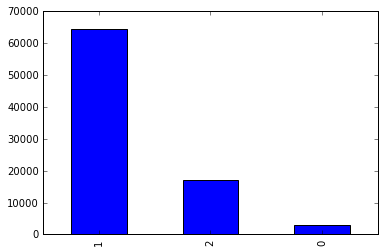

In [86]:
df["Company response to consumer"].value_counts().plot(kind='bar')


# MODELING

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize, MaxAbsScaler
from sklearn.cross_validation import train_test_split

import sklearn.metrics as skm
from sklearn.metrics import roc_curve, auc

from scipy import interp

from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Non-Text Features

In [88]:
X = model_data.values
y_start = df['Company response to consumer']
y = label_binarize(y_start, classes = [0, 1, 2])
n_classes = 2
print y_start.shape
model_data.head()

(84466,)


,Product,Sub-product,Issue,Sub-issue,Tags,State,Submitted via
0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0
2,0,0,2,0,0,2,0
3,2,0,3,2,0,3,0
4,1,2,1,3,0,4,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [90]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# X_train.shape
y_train.shape

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(59126, 3)

#### Using One v Rest classifier to predict each class against the other with NB

In [91]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto'))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

In [92]:
score = clf.score(X_test, y_test)
# accuracy = clf.accuracy()
# Precision_Recall = clf.rec

print score

0.540213101815


In [93]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_score[:, i],drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

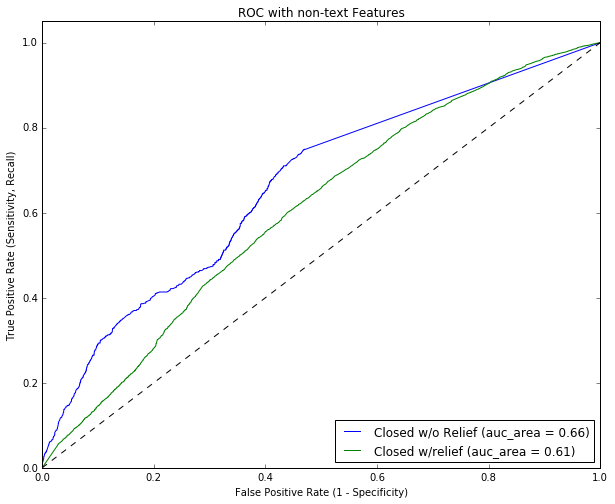

In [95]:
fig = plt.figure(figsize=(10, 8))

label = ['Closed w/o Relief', 'Closed w/relief']  #'Closed w/explaination',
for i,v in enumerate(label):
    plt.plot(fpr[i], tpr[i], label= v + ' (auc_area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity, Recall)')
plt.title('ROC with non-text Features')
plt.legend(loc="lower right")


plt.show()

#### Random Forest

In [96]:
rfc = RandomForestClassifier(n_estimators=750, n_jobs=-1, class_weight='auto')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
def feat_importance(clf, X, max_features=10):
    '''Plot Feature Importance'''
    feature_importance = clf.feature_importances_
    
    # Make importances rel to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top XX features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Non-Text Feature Importance')
    
    plt.show()

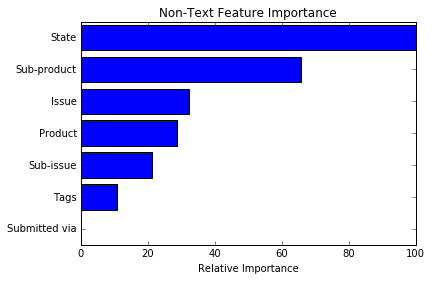

In [98]:
feat_importance(rfc, model_data, max_features=10)

## Logistic Regression


In [99]:
df2 = pd.read_csv('../data/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv')

In [100]:
model_data2 = pd.DataFrame()

In [101]:
feature_for_model=['Product', 'Sub-product','Issue','Sub-issue','Tags', 'State', 'Submitted via']

for name in feature_for_model:
    val ={}
    i=0
    for value in df2[name].unique(): 
        val[value] = i
        i+=1
       
    df2[name] = df2[name].apply(lambda x: val[x])
    model_data2[name] = df2[name].astype('category')

In [102]:
# For use with text df
cust_resp_dict ={'Closed':0,
                 'Untimely response':0,
                 'Closed with explanation':0,
                 'Closed with non-monetary relief':1,
                 'Closed with monetary relief':1}

In [103]:
df2['Company response to consumer'] = df2['Company response to consumer'].apply(lambda x: cust_resp_dict[x])

In [104]:
df2['Company response to consumer'].value_counts(dropna=False)

0    67434
1    17032
Name: Company response to consumer, dtype: int64

In [105]:
X2 = model_data.values
y2 = df['Company response to consumer'].values
y2 = label_binarize(y_start, classes = [0, 1])
# n2_classes = 2
# y2_start.shape
y2 = y2.sum(axis=1)
#  Need to sum y2 to make it a single column for use in LR model

In [106]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=11)

In [107]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
# X_train.shape
y2_train.shape

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(59126,)

In [108]:
y2_train

array([1, 1, 1, ..., 0, 1, 0])

In [109]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
v_probs = lr.predict_proba(X2_test)[:, 1]

In [111]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y2_test, title, xlabel, ylabel):
    # ROC
    fig = plt.figure(figsize = (8,6))
    tpr, fpr, thresholds = roc_curve(v_probs, y2_test)
    
    import sklearn.metrics as skm
    auc = skm.roc_auc_score(y2_test, v_probs)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, 'k--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    fig.savefig(title+'.png')

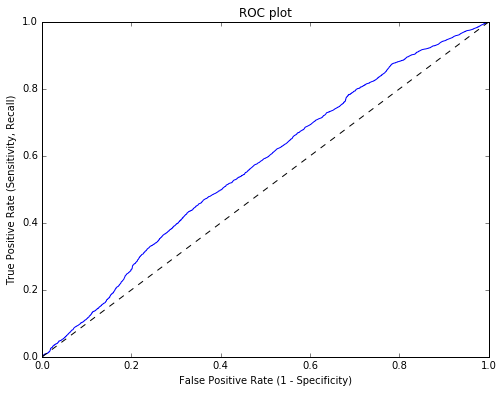

In [112]:
plot_roc(v_probs, y2_test, "ROC plot", "False Positive Rate (1 - Specificity)", 
         "True Positive Rate (Sensitivity, Recall)")

In [113]:
skm.roc_auc_score(y2_test, v_probs)

0.56796884110561319

In [114]:
skm.recall_score(y2_test, lr.predict(X2_test))

0.6053032911890589

In [115]:
skm.precision_score(y2_test, lr.predict(X_test))

0.82704846407205757

# USE TEXT FEATURES

In [116]:
df_words = pd.DataFrame()
df_words_labels = pd.DataFrame()
#df_txt = pd.read_csv('../data/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv')

In [117]:
df_words['Consumer complaint narrative'] = df['Consumer complaint narrative']
df_words['Company response to customer'] = df['Company response to consumer']

In [118]:
df_words.head()

,Consumer complaint narrative,Company response to customer
0,Received Capital One charge card offer XXXX. A...,1
1,I do n't know how they got my cell number. I t...,1
2,I 'm a longtime member of Charter One Bank/RBS...,1
3,"After looking at my credit report, I saw a col...",2
4,I received a call from a XXXX XXXX from XXXX @...,1


In [119]:
# # Try not removing XXXX's to see if leaving personal info (even though redacted) has effect
# #  Remove XXX's in data where personal info has been removed
# chars_to_remove = ['XX', 'XXX', 'XXXX']
# df_words['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: x.translate(None, ''.join(chars_to_remove)))

In [120]:
df_words.head()

,Consumer complaint narrative,Company response to customer
0,Received Capital One charge card offer XXXX. A...,1
1,I do n't know how they got my cell number. I t...,1
2,I 'm a longtime member of Charter One Bank/RBS...,1
3,"After looking at my credit report, I saw a col...",2
4,I received a call from a XXXX XXXX from XXXX @...,1


### TF-IDF

In [121]:
X_words = df['Consumer complaint narrative'].values

In [122]:
y_labels = df['Company response to consumer'].values

In [123]:
y = label_binarize(y_labels, classes=[0, 1, 2])
n_classes = 3

In [124]:
X2_train_words, X2_test_words, y2_train, y2_test = train_test_split(X_words, y, test_size=0.30, random_state=11)
print X2_train_words.shape
print X2_test_words.shape
print y2_train.shape
print y2_test.shape
vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, min_df=0.001, max_df = 0.2)

(59126,)
(25340,)
(59126, 3)
(25340, 3)


In [125]:
X_words_train = vectorizer.fit_transform(X2_train_words)
X_words_test = vectorizer.transform(X2_test_words)  # DONT FIT_TRANSFORM THE TEST SET YOU NINNY.
X_words_matrix = vectorizer.transform(X_words)


print X_words_train.shape
print X_words_test.shape
print X_words_matrix.shape

(59126, 4259)
(25340, 4259)
(84466, 4259)


In [126]:
X_words_train
print y_train.shape
print y_test.shape

(59126, 3)
(25340, 3)


In [127]:
nbc = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto'),n_jobs=-1)
y2_score = nbc.fit(X_words_train, y2_train).predict_proba(X_words_test)

In [128]:
score = nbc.score(X_words_test, y2_test)
score

0.77411207576953434

In [129]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_test[:, i],y2_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


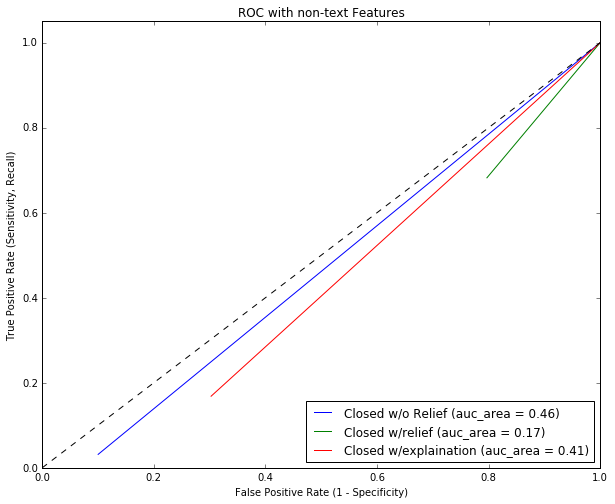

In [130]:
fig = plt.figure(figsize=(10, 8))

label = ['Closed w/o Relief', 'Closed w/relief', 'Closed w/explaination']
for i,v in enumerate(label):
    plt.plot(fpr[i], tpr[i], label= v + ' (auc_area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity, Recall)')
plt.title('ROC with non-text Features')
plt.legend(loc="lower right")


plt.show()

## Word2Vec
## Bag o' Words

In [131]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords


In [132]:
df_words.shape
df_words.columns.values

array(['Consumer complaint narrative', 'Company response to customer'], dtype=object)

In [133]:
print df_words['Consumer complaint narrative'][0]

Received Capital One charge card offer XXXX. Applied, was accepted ( {$500.00} limit ), activated card and used for XXXX presents. Charge card # XXXX. Right after activating card ... Capital One sent me another card with same {$500.00} limit ... never activated ... never used that card. First bill from above card # came due XXXX and minimum payment due was {$15.00}. I sent in {$20.00} via USPMO and sent in before due date. With the XXXX non-activated, non used credit card ... ..they also sent me bill for some yearly fees when never even activated the card. So called them up ... ... .told them did not want the card and sent back to them. Well ... .get my next bill from the card # above ( XXXX ) ... .they did not credit me for the {$20.00} payment and charged me outrageous over the limit fees, late fees, etc ... and now {$70.00} payment due. So, I called up, their rep stated they accidentally applied my {$20.00} payment to wrong account number and would be corrected. So, I sent in a {$70

In [134]:
example1 = BeautifulSoup(df_words['Consumer complaint narrative'][0])

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [135]:
print df_words['Consumer complaint narrative'][0]
print example1.get_text()

Received Capital One charge card offer XXXX. Applied, was accepted ( {$500.00} limit ), activated card and used for XXXX presents. Charge card # XXXX. Right after activating card ... Capital One sent me another card with same {$500.00} limit ... never activated ... never used that card. First bill from above card # came due XXXX and minimum payment due was {$15.00}. I sent in {$20.00} via USPMO and sent in before due date. With the XXXX non-activated, non used credit card ... ..they also sent me bill for some yearly fees when never even activated the card. So called them up ... ... .told them did not want the card and sent back to them. Well ... .get my next bill from the card # above ( XXXX ) ... .they did not credit me for the {$20.00} payment and charged me outrageous over the limit fees, late fees, etc ... and now {$70.00} payment due. So, I called up, their rep stated they accidentally applied my {$20.00} payment to wrong account number and would be corrected. So, I sent in a {$70

In [136]:
import re

In [137]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [138]:
clean_review = review_to_words(df_words['Consumer complaint narrative'][0])
print clean_review

received capital one charge card offer xxxx applied accepted limit activated card used xxxx presents charge card xxxx right activating card capital one sent another card limit never activated never used card first bill card came due xxxx minimum payment due sent via uspmo sent due date xxxx non activated non used credit card also sent bill yearly fees never even activated card called told want card sent back well get next bill card xxxx credit payment charged outrageous limit fees late fees etc payment due called rep stated accidentally applied payment wrong account number would corrected sent payment via uspmo along note make sure account corrected payments applied correct account number minimum due wanted keep card also repair credit bankruptcy xxxx xxxx xxxx bill came mail apply payment previous payment stated would correct charged outrageous limit fees late fees etc along stupid note spreading thin thought wow total bs called numerous times wrote numerous times success correcting a

In [139]:
# Get the number of reviews based on the dataframe column size
print df_words['Consumer complaint narrative'].size
num_reviews = df_words['Consumer complaint narrative'].size
print num_reviews
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []


# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
print "Cleaning and parsing the training set movie reviews...\n"
clean_train_reviews = []
for i in xrange( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_reviews )                                                                    
    clean_train_reviews.append(review_to_words(df_words['Consumer complaint narrative'][i]))

84466
84466
Cleaning and parsing the training set movie reviews...

Review 1000 of 84466

Review 2000 of 84466

Review 3000 of 84466

Review 4000 of 84466

Review 5000 of 84466

Review 6000 of 84466

Review 7000 of 84466

Review 8000 of 84466

Review 9000 of 84466

Review 10000 of 84466

Review 11000 of 84466

Review 12000 of 84466

Review 13000 of 84466

Review 14000 of 84466

Review 15000 of 84466

Review 16000 of 84466

Review 17000 of 84466

Review 18000 of 84466

Review 19000 of 84466

Review 20000 of 84466

Review 21000 of 84466

Review 22000 of 84466

Review 23000 of 84466

Review 24000 of 84466

Review 25000 of 84466

Review 26000 of 84466

Review 27000 of 84466

Review 28000 of 84466

Review 29000 of 84466

Review 30000 of 84466

Review 31000 of 84466

Review 32000 of 84466

Review 33000 of 84466

Review 34000 of 84466

Review 35000 of 84466

Review 36000 of 84466

Review 37000 of 84466

Review 38000 of 84466

Review 39000 of 84466

Review 40000 of 84466

Review 41000 of 84466

In [140]:
print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [141]:
print train_data_features.shape

(84466, 5000)


In [142]:
vocab = vectorizer.get_feature_names()
print vocab

[u'aadvantage', u'abandoned', u'abide', u'ability', u'able', u'abruptly', u'absence', u'absent', u'absolute', u'absolutely', u'absurd', u'abuse', u'abused', u'abusing', u'abusive', u'acc', u'accelerate', u'accelerated', u'acceleration', u'accent', u'accept', u'acceptable', u'acceptance', u'accepted', u'accepting', u'access', u'accessed', u'accessing', u'accident', u'accidentally', u'accommodate', u'accomplish', u'accomplished', u'accordance', u'according', u'accordingly', u'account', u'accountability', u'accountable', u'accountant', u'accounted', u'accounting', u'accounts', u'accrue', u'accrued', u'accruing', u'acct', u'accts', u'accumulated', u'accuracy', u'accurate', u'accurately', u'accused', u'accusing', u'ace', u'ach', u'achieve', u'acknowledge', u'acknowledged', u'acknowledgement', u'acknowledges', u'acknowledging', u'acount', u'acquire', u'acquired', u'acquiring', u'acquisition', u'across', u'acs', u'act', u'acted', u'acting', u'action', u'actions', u'activate', u'activated', u'

In [143]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print count, tag

177 aadvantage
150 abandoned
158 abide
1462 ability
10041 able
104 abruptly
83 absence
72 absent
152 absolute
1208 absolutely
224 absurd
554 abuse
154 abused
82 abusing
718 abusive
151 acc
84 accelerate
89 accelerated
86 acceleration
88 accent
2862 accept
570 acceptable
769 acceptance
1793 accepted
455 accepting
4370 access
265 accessed
163 accessing
620 accident
149 accidentally
86 accommodate
99 accomplish
83 accomplished
522 accordance
3326 according
371 accordingly
96291 account
160 accountability
488 accountable
132 accountant
107 accounted
1026 accounting
13666 accounts
201 accrue
515 accrued
249 accruing
2051 acct
139 accts
211 accumulated
588 accuracy
1974 accurate
531 accurately
243 accused
118 accusing
142 ace
681 ach
108 achieve
857 acknowledge
737 acknowledged
212 acknowledgement
76 acknowledges
238 acknowledging
74 acount
163 acquire
603 acquired
98 acquiring
90 acquisition
338 across
188 acs
5301 act
366 acted
515 acting
4974 action
1795 actions
362 activate
438 activated

In [ ]:
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, df_words['Consumer complaint narrative'])

Training the random forest...


In [ ]:
forest.score

## Word2Vec - Word Vectors

In [ ]:
import pandas as pd

# Read data from files 
train = pd.read_csv( "labeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )

# Verify the number of reviews that were read (100,000 in total)
print "Read %d labeled train reviews, %d labeled test reviews, " \
 "and %d unlabeled reviews\n" % (train["review"].size,  
 test["review"].size, unlabeled_train["review"].size )

In [ ]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)